In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple linear regression

A linear regression model finds weights for a linear combination of features:
$$
y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \pmb{w} \pmb{X}
$$

The direct solution for linear regression (called **Normal Equation**) is:
$$
\hat{\pmb{w}} = (\pmb{X}^T \pmb{X})^{-1} \pmb{X}^T \pmb{y}
$$

For predictions based on $ \hat{\pmb{w}} $,
$$
\hat{y} = \hat{\pmb{w}} \pmb{X}
$$

The mean squared error is then
$$
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

In [42]:
# Example from Aurelien Geron's bookS
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [43]:
# Compute the linear regression coefficients using the normal equation
X_mod = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that we also calculate w0
w_NE = np.linalg.inv(X_mod.T.dot(X_mod)).dot(X_mod.T).dot(y) # weights using the normal equation
w_NE

array([[3.72646703],
       [3.29992274]])

In [44]:
# Making predictions using the weights from the normal equation
X_test = np.array([[0], [2]])
X_test_mod = np.c_[np.ones((2, 1)), X_test] # add x0 = 1 to each instance so that we also calculate w0
y_predict = X_test_mod.dot(w_NE)
y_predict

array([[ 3.72646703],
       [10.32631252]])

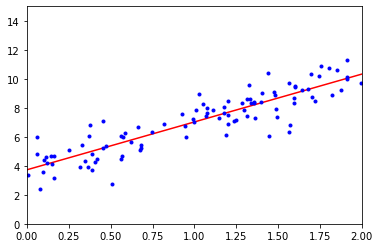

In [45]:
plt.plot(X_test, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.72646703]), array([[3.29992274]]))

In [47]:
X_test = np.linspace(0, 2, 100).reshape(100, 1)
y_predict = lin_reg.predict(X_test)

In [48]:
# Calculate the mean squared error
y_test = 4 + 3 * X_test + np.random.randn(100, 1)
mean_squared_error = np.mean((y_predict - y_test) ** 2)
mean_squared_error

1.2373677652185409

## Linear regression with gradient descent 

In gradient descent alogrithms, the weights are updated using the gradient of the cost function. The weight update equation is given by:
$$
\pmb{w}_{i+1} = \pmb{w}_{i} - \eta \nabla_{\pmb{w}} MSE(\pmb{w}_{i})
$$
where $ \eta $ is the learning rate.

In [1]:
eta = 0.1
n_iterations = 1000
m = 100

def gradient_descent(X, y, w, eta, n_iterations):
    """
    Perform gradient descent to learn theta
    by taking n_iterations gradient steps with learning rate eta
    """
    for i in range(n_iterations):
        y_predict = X.dot(w)
        w = w - eta * (1 / m) * X.T.dot(y_predict - y)
    return w